<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.645349,33.084007,0.008778,92.738134,92.731300,0.006834
1,0.0,1.0,89.768933,47.900851,0.009013,147.678797,147.670276,0.008521
2,0.0,2.0,34.034669,47.098678,0.011813,91.145160,91.135114,0.010046
3,0.0,3.0,77.538054,88.493540,-0.000468,176.031126,176.030837,0.000289
4,0.0,4.0,82.909950,48.801881,-0.000278,141.711552,141.712442,-0.000890
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,93.146458,89.964016,0.001560,193.112034,193.112422,-0.000389
29996,999.0,26.0,81.007891,32.849459,0.000878,123.858228,123.859061,-0.000833
29997,999.0,27.0,86.454149,87.809580,0.000131,184.263861,184.265378,-0.001517
29998,999.0,28.0,45.101543,48.059200,0.002130,103.162873,103.160687,0.002186


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.645349,33.084007,0.008778,92.738134,92.731300,0.006834
1,0.0,1.0,89.768933,47.900851,0.009013,147.678797,147.670276,0.008521
2,0.0,2.0,34.034669,47.098678,0.011813,91.145160,91.135114,0.010046
3,0.0,3.0,77.538054,88.493540,-0.000468,176.031126,176.030837,0.000289
4,0.0,4.0,82.909950,48.801881,-0.000278,141.711552,141.712442,-0.000890
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,93.146458,89.964016,0.001560,193.112034,193.112422,-0.000389
29996,999.0,26.0,81.007891,32.849459,0.000878,123.858228,123.859061,-0.000833
29997,999.0,27.0,86.454149,87.809580,0.000131,184.263861,184.265378,-0.001517
29998,999.0,28.0,45.101543,48.059200,0.002130,103.162873,103.160687,0.002186


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

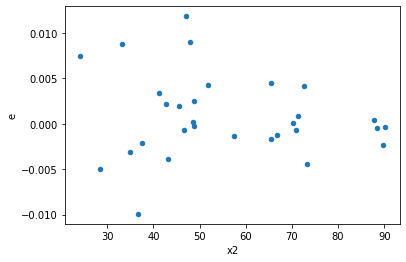

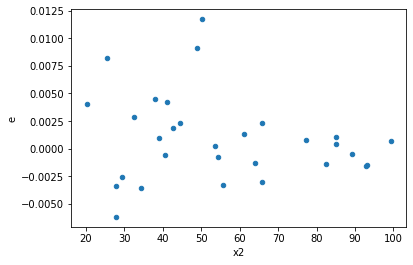

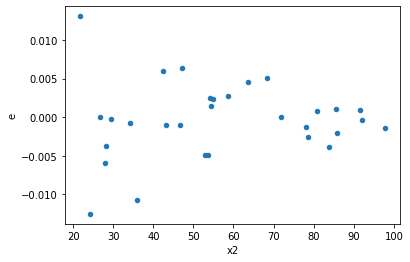

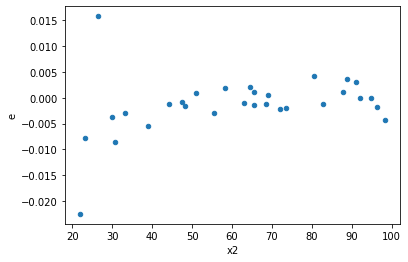

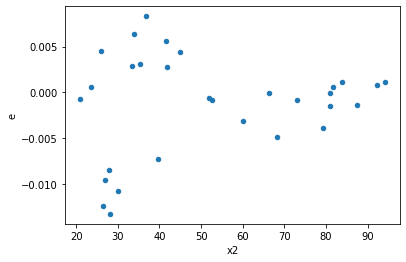

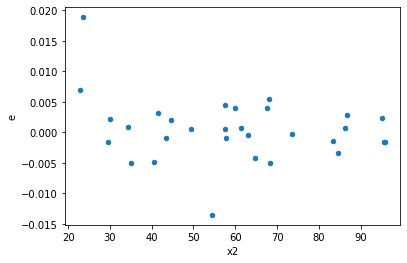

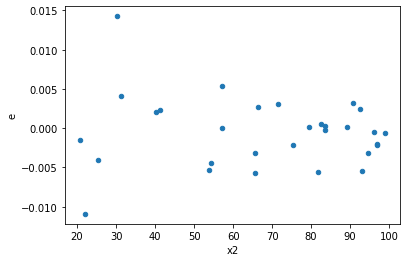

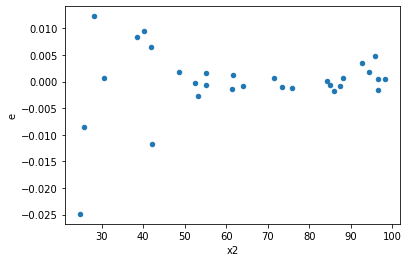

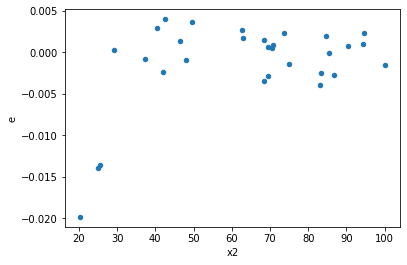

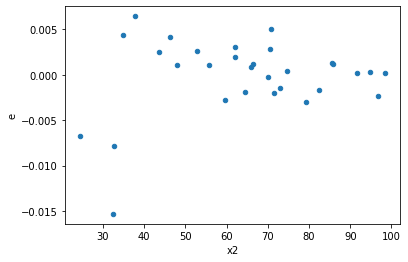

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,16.0,10.0,0.00029072986256285934,0.00019888916751139335,1.817061641017871e-05,1.9888916751139333e-05,1.0945647798716436,0.9119881991601382,0.5440059004199309,0.4559940995800691,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,1.4517906062844066e-05,0.000407475801483303,1.3198096420767332e-06,2.7165053432220198e-05,20.582554154912614,9.022539895209292e-07,0.9999995488730052,4.511269947604646e-07,Reject001=0 : Heteroscedasticity
5.0,15.0,11.0,0.0003981056235637766,0.00033115181058943397,2.6540374904251774e-05,3.0104710053584907e-05,1.1342985983503242,0.8490790930763803,0.5754604534618099,0.42453954653819015,Reject001=1 : Homoscedasticity
6.0,9.0,17.0,5.2516179220959745e-05,0.0005155436247552996,5.835131024551083e-06,3.0326095573841153e-05,5.197157603873041,0.0035188339015137515,0.9982405830492431,0.0017594169507568758,Reject001=0 : Heteroscedasticity
8.0,18.0,8.0,8.495221986762832e-05,0.00032705272513183477,4.7195677704237954e-06,4.0881590641479346e-05,8.662147177475187,0.004092241651400208,0.9979538791742999,0.002046120825700104,Reject001=0 : Heteroscedasticity
12.0,17.0,9.0,0.0002270500398375653,0.0007835892641174359,1.3355884696327371e-05,8.706547379082621e-05,6.518884803997122,0.007095942655726661,0.9964520286721367,0.0035479713278633307,Reject001=0 : Heteroscedasticity
16.0,8.0,18.0,1.2102787534420916e-05,0.0010938709502696924,1.5128484418026145e-06,6.0770608348316244e-05,40.169660535133204,1.2626824030803618e-09,0.9999999993686588,6.313412015401809e-10,Reject001=0 : Heteroscedasticity
18.0,13.0,13.0,0.0001696889878303361,0.00019080595564929044,1.3052999063872008e-05,1.4677381203791573e-05,1.1244451280484282,0.8357246170116859,0.5821376914941571,0.41786230850584294,Reject001=1 : Homoscedasticity
20.0,12.0,14.0,0.0001172897909462587,0.00024883972018902695,9.774149245521559e-06,1.777426572778764e-05,1.8184974754638286,0.285004600316759,0.8574976998416205,0.1425023001583795,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,10.0,0.00029072986256285934,0.00019888916751139335,1.817061641017871e-05,1.9888916751139333e-05,1.0945647798716436,0.9119881991601382,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,1.4517906062844066e-05,0.000407475801483303,1.3198096420767332e-06,2.7165053432220198e-05,20.582554154912614,9.022539895209292e-07,Reject001=0 : Heteroscedasticity
2.0,14.0,12.0,0.0004830975099030582,5.01492838073761e-05,3.4506964993075585e-05,4.1791069839480086e-06,0.12110908579721856,0.0003989375216510215,Reject001=0 : Heteroscedasticity
3.0,7.0,19.0,0.00037143300219497847,9.471696947456166e-05,5.3061857456425496e-05,4.985103656555877e-06,0.09394890973520205,0.0037836194496084314,Reject001=0 : Heteroscedasticity
4.0,17.0,9.0,0.0007345385312530867,1.5500207482493216e-05,4.3208148897240393e-05,1.7222452758325796e-06,0.03985927006335084,8.416902770384404e-08,Reject001=0 : Heteroscedasticity
5.0,15.0,11.0,0.0003981056235637766,0.00033115181058943397,2.6540374904251774e-05,3.0104710053584907e-05,1.1342985983503242,0.8490790930763803,Reject001=1 : Homoscedasticity
6.0,9.0,17.0,5.2516179220959745e-05,0.0005155436247552996,5.835131024551083e-06,3.0326095573841153e-05,5.197157603873041,0.0035188339015137515,Reject001=0 : Heteroscedasticity
7.0,16.0,10.0,0.001071190109447273,3.936661654332975e-05,6.694938184045456e-05,3.936661654332975e-06,0.05880056762457252,2.154488440213873e-06,Reject001=0 : Heteroscedasticity
8.0,18.0,8.0,8.495221986762832e-05,0.00032705272513183477,4.7195677704237954e-06,4.0881590641479346e-05,8.662147177475187,0.004092241651400208,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    524
Reject001=1 : Homoscedasticity      476
Name: Result_test, dtype: int64